| **Assignment 3**  | **Math 359 Mathematics of Data Science** |
|-------------------|--------------------------------------------|
| **Name:**         | Emily Otter                    |      
| *corrected answeres from Brendan Ames (professor)

# Problem 1: Angular and Euclidean Nearest Neighbors

Let $z_1, \dots, z_n$ be a collection of $p$-vectors.

Recall that $z_j$ is the **nearest neighbor** of $x \in \mathbf{R}^p$ if
$$
    d(x, z_j) \le d(x, z_i)
$$
for all $i = 1,2, \dots, n$.


## Part 1a

Give an example using $3$ points $\{x, z_1, z_2\}$ where $z_1$ is the nearest neighbor of $x$ with respect to **Euclidean distance** and $z_2$ is the nearest neighbor of $x$ with respect to **cosine distance**.

### Solution

#### Constructing a Solution

There are many examples. The main idea for finding the three is to leverage the fact that the cosine similarity and distance are scale invariant:
$$
\frac{x^T y}{\|x\| \|y\|} =
\frac{(\alpha x)^T (\beta y)}{\|\alpha x\|\|\beta y \|}
$$
for any $\alpha, \beta \in \mathbf{R}$ and $x,y \in \mathbf{R}^n$.

In particular, we have $d_{\cos}(x, \alpha x ) = 0$ for all $x \in \mathbf{R}^n$ and $\alpha > 0$.

This implies that we have
$$
    d_{\cos}(x, y) > d_{\cos}(x, \alpha x)
$$
for and any $y$ not on the ray $\{\alpha x: \alpha > 0\}$.

#### A Specific Example
Consider
$$
x =
\begin{pmatrix} 1 \\ 0 \end{pmatrix}, \hspace{0.5in}
z_1 = \frac{1}{\sqrt{2}}
\begin{pmatrix} 1 \\ 1 \end{pmatrix}, \hspace{0.5in}
z_2 =
\begin{pmatrix} 2 \\ 0 \end{pmatrix}.
$$
Then
$$
    d_{\cos}(x, z_2) = 0 < d_{\cos}(x, z_1) = 1 - \frac{1}{\sqrt{2}} = \frac{\sqrt{2} - 1}{\sqrt{2}}.
$$
On the other hand,
\begin{align*}
    d_2(x, z_2)^2 = 1 > d_2(x, z_1)^2  = \left(1 - \frac{1}{\sqrt{2}}\right)^2 + \frac{1}{2} = 2 - \sqrt{2} \approx 0.76.
\end{align*}

#### Calculating the Distances using Python

We can verify these distances by computing them using python.
We first define a function for calculating the cosine distance:

In [ ]:
import numpy as np
import numpy.linalg as la

d_cos = lambda x, y: 1 - (x.dot(y))/(la.norm(x)*la.norm(y))

The following code prints a table of distances between the three points $x, z_1$, and $z_2$.

In [ ]:
# Define the three points.
x = np.array([1,0])
z_1 = np.ones(2)/np.sqrt(2)
z_2 = 2*x

# Make and print the table.
print("%5s | %-10s | %-10s" %("", "Euclidean", "Cosine"))
print("="*35)
print("%5s | %-10f | %-10f" %("z_1", la.norm(x - z_1) , d_cos(x, z_1)))
print("%5s | %-10f | %-10f" %("z_2", la.norm(x - z_2) , d_cos(x, z_2)))

      | Euclidean  | Cosine    
  z_1 | 0.765367   | 0.292893  
  z_2 | 1.000000   | 0.000000  


As we can see, $z_1$ is closest to $x$ with respect to Euclidean distance but $z_2$ is closest to $x$ with respect to cosine distance.

#### Plotting the Points

The following code plots the three points as well as the unit circle and ray $\{(t, 0): t > 0\}$ as reference lines.

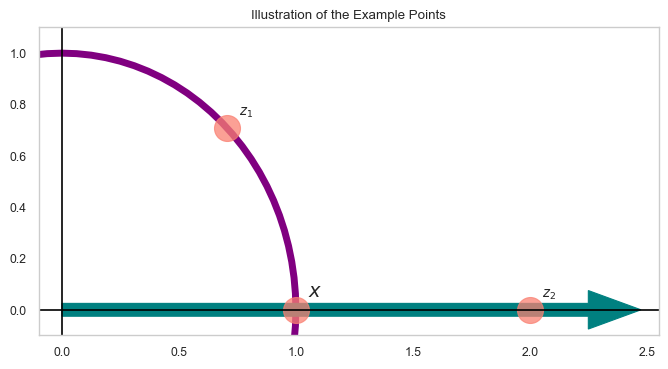

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
# Plot the three points.
pts = np.stack([x, z_1, z_2])
plt.scatter(
    x = pts[:, 0],y = pts[:,1],
    s = 350, color = "salmon", alpha = 0.75,
    zorder = 2)
plt.text(1.05,0.05, "$x$", fontsize = 14)
plt.text(z_1[0]+0.05, z_1[1]+0.05, "$z_1$")
plt.text(z_2[0]+0.05, z_2[1]+0.05, "$z_2$")

# Plot the unit circle
thetas = np.linspace(0, 2*np.pi, 101)
plt.plot(
    np.cos(thetas), np.sin(thetas),
     linewidth = 5, color = "purple",
     zorder = 0)

# Plot the ray.
plt.arrow(
    x=0, y=0, dx=2.25, dy=0,
    width = .05,
    facecolor = "teal",edgecolor = "teal",
    zorder = 1)

plt.xlim([-0.1, 2.55]); plt.ylim([-0.1, 1.1])
plt.axhline(0, color = "k") #x-axis line
plt.axvline(0, color = "k") #y-axis line
plt.title("Illustration of the Example Points")
plt.grid()

plt.show()


## Part 1b

Now suppose that $x, z_1, z_2, \dots, z_n$ are **normalized** so that
$$
    \|x\|_2 = 1, \hspace{0.25in} \|z_i\|_2 = 1, \;\; i = 1,2, \dots, n.
$$
Show that the nearest neighbor with respect to Euclidean and cosine distance are the same point.

**Hint:**
Assume that the $z_i$ are ordered in increasing Euclidean distance from $x$:
$$
    \|x - z_1 \|_2 \le \|x - z_2 \|_2 \le \cdots \le \|x - z_n\|_2.
$$
Note that this implies that $z_1$ is the Euclidean distance nearest neighbor to $x$.
Use this fact to show that $z_1^T x \le z_2^T x \le \cdots \le z_n^T x$, and thus $z_1$ is the nearest neighbor to $x$ with respect to the angular/cosine distance.

### Solution

Following the hint, let's assume that the points $z_1, z_2, \dots, z_n$ are ordered in nondecreasing order of distance to $x$.

This implies that
$$
    d_2(z_i, x)^2 = x^T x - 2z_i^T x + z_i^T z_i = 2 \left(1 - z_i^T x \right)
    = 2 d_{\cos}(z_i, x)
$$
since $x^T x = 1$ and $z_i^T z_i = 1$ for all $i = 1,2,\dots, n$.
This implies that
$$
    d_{\cos}(z_i,x) \le d_{\cos}(z_{i+1}, x)
$$
for all $i$ since $d_2(z_i, x)^2 \le d_2(z_{i+1}, x)$.
In particular, $z_1$ is the nearest neighbor of $x$ with respect to the cosine distance in this case.

    

# Problem 2: A Geometric Interpretation of Orthogonal Matrices

Suppose that
$$
Q = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \in \mathbf{R}^{2 \times 2}
$$
is **orthogonal:** $Q^T Q = I = Q Q^T$.

## Part 2a

Establish the following conditions:
$$
(i)\;\;a^2 + c^2 = 1 \hspace{0.25in}
(ii)\;\;b^2 + d^2 = 1 \hspace{0.25in}
(iii)\;\;ab + cd = 0.
$$

**Hint:** Consider the system of equations involving $a, b, c, d$ given by $Q^T Q = I$.

### Solution

Substituting the given formula for $Q$, we have
$$
Q^T Q =
\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}
=  
\begin{pmatrix} a & c \\ b & d \end{pmatrix}
\begin{pmatrix} a & b \\ c & d \end{pmatrix}
=
\begin{pmatrix}
    a^2 + c^2 & ab + cd \\ ab + cd & b^2 + d^2.
\end{pmatrix}
$$
Comparing the entries of the matrix equation establishes the identities.

## Part 2b

Show that $|\det Q| = 1$ and conclude that
$$
    b = - \det Q \cdot c \hspace{0.25in}
    d = \det Q \cdot a
$$
**Hint:** Use the identities established in [Part 2a](#part-2a) to show that $\left(\det Q \right)^2 = 1$. Then use the formula for the determinant to infer the relationships between $a, b, c,$ and $d$.

### Solution

Taking the square of the determinant

\begin{align*}
(\det Q)^2 &= (ad - bc)^2
=a^2 d^2 - 2 \underbrace{ab}_{=-cd} cd + b^2 c^2 \\
&= a^2 d^2 + a^2 b^2 + c^2 d^2 + b^2 c^2  \\
&= a^2\underbrace{(b^2 + d^2)}_{=1}
 + c \underbrace{(d^2 + b^2)}_{=1} \\
&= a^2 + c^2 = 1.
\end{align*}

To show that $b = -\det Q \cdot c$, note that
$$
Q^{-1} = \frac{1}{\det Q}
\begin{pmatrix} d & b \\ - c & a \end{pmatrix}  =
\begin{pmatrix} a & c \\ b & d \end{pmatrix}
= Q^T.
$$
Equating the $(1,2)$ and $(2, 1)$ entries shows that
$$
    \frac{1}{\det Q} \cdot c = -b \;\;\;\Longrightarrow \;\;\;
    b = -\det Q \cdot c.
$$
Similarly, equating the $(1,1)$-entry of the left and right-hand sides shows that
$$
    \frac{a}{\det Q} = d \;\;\; \Longrightarrow \;\;\; a = \det Q \cdot d,
$$
as required.

## Part 2c

Suppose that $a = \cos \theta$ for some angle $\theta$. Use the results of [Part 2a](#part-2a) and [Part 2b](#part-2b) to conclude that $Q$ is either:

1. a **rotation matrix** encoding a rotation of $\theta$ radians counter-clockwise:
$$
Q = \begin{pmatrix}
\cos \theta & - \sin\theta \\ \sin \theta & \cos \theta
\end{pmatrix}
$$
2. a **matrix** encoding a **reflection** across the line passing through the origin and making an angle of $\theta/2$ with the horizontal axis:
$$
Q = \begin{pmatrix}
\cos \theta &  \sin\theta \\ \sin \theta & -\cos \theta
\end{pmatrix}.
$$

**Hint:** Consider the two possible values of $\det Q$ as separate cases and relate the suggested value $a = \cos \theta$ to the remaining entries of $Q$.

### Solution

Let $a = \cos \theta$ and suppose $\det Q = 1$.
The identity $a^2 + c^2 = 1$ implies that
$$
    c^2 = \sin^2 \theta \;\; \Longrightarrow \;\; c = \pm \sin \theta.
$$
Then [Part 2b](#part-2b) implies that
$$
    b = - c = \mp \sin \theta, \hspace{0.25in}
    d = a = \cos \theta.
$$
Therefore,
$$
Q =
\begin{pmatrix}
\cos\theta & \mp\sin\theta \\ \pm \sin\theta & \cos \theta.
\end{pmatrix}
$$
Substituting $\theta = 2\pi - \theta$ for any $\theta$ such that $\sin \theta < 0$ (i.e., $\pi \le \theta \le 2\pi$) gives
$$
Q =
\begin{pmatrix}
\cos\theta & -\sin\theta \\ + \sin\theta & \cos \theta
\end{pmatrix}.
$$
On the other hand, if $\det Q = -1$ and $a = \cos \theta$, then
$$
    c = \sin \theta = b, \hspace{0.25in} d = -a = -\cos \theta.
$$
In this case,
$$
Q =
\begin{pmatrix}
\cos\theta & \sin\theta \\ \sin\theta & -\cos \theta
\end{pmatrix}.
$$


# Problem 3: Comparing Classifiers using Synthetic Data

## Part 3a

The file ``A3_Prob3a.npz`` contains data in the plane belonging to one of two classes, labeled using $\{-1, 1\}$, split into training and validation sets.

We can load this data using the function ``Assn3_data_loader`` defined below (after importing necessary libraries):

<a id="data_loader"></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper")

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def Assn3_data_loader(filename):
    tmp = np.load(filename)
    X_train = tmp["X_train"]
    X_test = tmp["X_test"]
    y_train = tmp["y_train"]
    y_test = tmp["y_test"]
    return(X_train, y_train, X_test, y_test)

After defining the data loader, we can use it to import the data set:

In [ ]:
X_train, y_train, X_test, y_test = Assn3_data_loader("A3_Prob3a.npz")

The following code makes scatter plots of the data, using color and shape to indicate class labels.

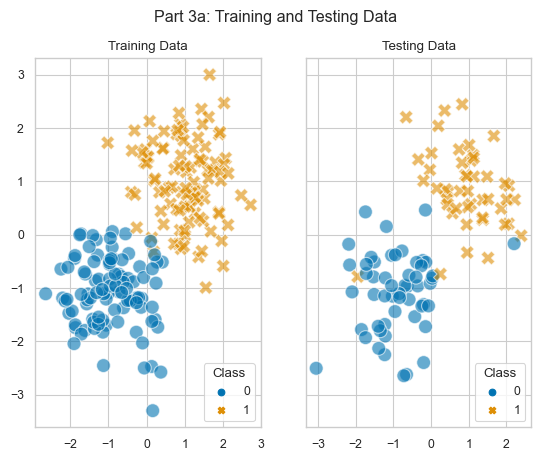

In [ ]:
# Define function for making the scatterplots.
def class_scatterplots(data, color_labels, marker_labels):
    sns.scatterplot(
        x = data[:,0], y = data[:,1],
        hue = color_labels, style = marker_labels,
        s = 100, alpha = 0.6, palette = "colorblind"
    )

# Make subplots of training and testing data.
fig, ax = plt.subplots(1,2, sharey = True)

# Plot training data.
plt.subplot(1,2, 1)
class_scatterplots(X_train, y_train, y_train)
plt.legend(title = "Class", loc = "lower right")
plt.title("Training Data")

# Plot testing data.
plt.subplot(1,2, 2)
class_scatterplots(X_test, y_test, y_test)
plt.legend(title = "Class", loc = "lower right")
plt.title("Testing Data")

plt.suptitle("Part 3a: Training and Testing Data")
plt.show()

### Fit Classifiers

Use ``scikit-learn`` to fit/train the following classifiers using the given training data:

1. **3-Nearest Neighbors** using **Euclidean distance**;

1. **3-Nearest Neighbors** using **Manhattan distance**;

1. **3-Nearest Neighbors** using **cosine distance**;

1. **Nearest centroid classificiation**;

1. **3-Nearest Neighbors** using **Euclidean distance** after transforming the data using **Linear Discriminant Analysis (LDA)**; and

1. **Nearest centroid classification** after **LDA**.

### Validating the Classifiers

For each of these models:

- Plot the **decision boundaries** of the classifier (with respect to the *training data*);

- Make a scatter plot of the *testing data*, with **marker color** used to indicated the **predicted labels** and **marker shape** used to indicate the **actual labels**

- Report the **accuracy** of each classifer for **both training** and **testing data**.

Compare the performance of these models and explain why or why not each one may accurately predict class membership from the training data.

#### Hints

- You can reuse the code above to make the scatter plots of the predicted and actual testing data labels.

- You can also superimpose this scatter plot on the decision boundary plot (as we've done many times in class).

- It might help to build pipelines for the classification models and to use loops to simplify any repeated calculations and plots.

#### Solution

We can start by importing the necessary functions from ``sklearn``:

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

We can make a list of pipelines for the six classification models to simplify our code for the fitting and validation process.

In [ ]:
# Initialize empty list of classifier pipelines.
class_pipelines = []

# Make pipelines for the first three classifiers
# (3-NN with different distances).
distance_list = ["euclidean", "cosine", "manhattan"]
for dist in distance_list:
    mod_name = "3NN-" + dist
    class_pipelines.append(
        Pipeline(
            [(mod_name, KNeighborsClassifier(
                n_neighbors=3, metric=dist
                )
            )]
        )
    )
# end for distances.

# Add remaining pipelines.
# NCC.
class_pipelines.append(
    Pipeline([("NCC", NearestCentroid())])
)
# 3NN after LDA
class_pipelines.append(
    Pipeline([
        ("LDA", LinearDiscriminantAnalysis()),
        ("3NN", KNeighborsClassifier(n_neighbors=3))
        ])
)

# NCC after LDA
class_pipelines.append(
    Pipeline([
        ("LDA", LinearDiscriminantAnalysis()),
        ("NCC", NearestCentroid())
        ])
)

We can use the following code to make the desired figures and compare classification accuracy.

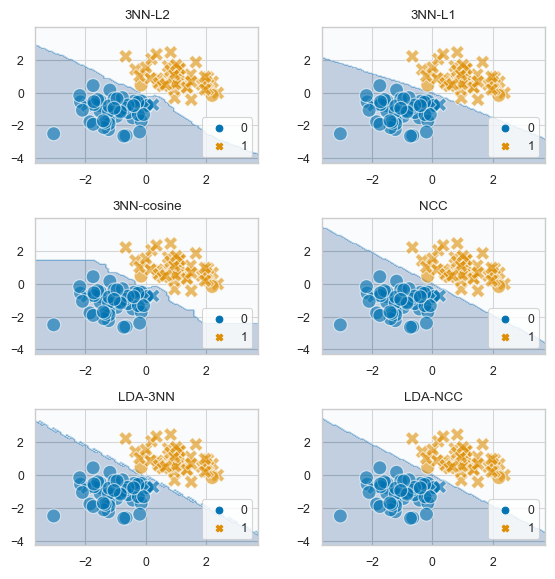

In [ ]:
# Names of classifiers.
classifier_names = [
    "3NN-L2", "3NN-L1", "3NN-cosine",
    "NCC", "LDA-3NN", "LDA-NCC"
]

# Initialize dictionaries for recording prediction accuracy.
train_scores = np.zeros(len(classifier_names))
test_scores = np.zeros(len(classifier_names))

# Initialize figure.
fig, axs = plt.subplots(
    3, 2,
    # sharey = True, sharex = True,
    figsize = (6, 6))
fig.tight_layout(pad = 2)

for i, pipe in enumerate(class_pipelines):
    # Fit i-th classifier.
    pipe.fit(X_train, y_train)

    # Record prediction accuracy.
    train_scores[i] = pipe.score(X_train, y_train)
    test_scores[i] = pipe.score(X_test, y_test)

    # Plot the decision boundaries.
    sp = plt.subplot(3, 2, i + 1)
    DecisionBoundaryDisplay.from_estimator(
        pipe, X_train,
        response_method="predict",
        alpha = 0.25, cmap = plt.cm.Blues_r,
        ax = sp
    )
    # Plot predictions.
    class_scatterplots(
        data = X_test,
        color_labels = pipe.predict(X_test),
        marker_labels = y_test)
    plt.title(classifier_names[i])
    plt.legend(loc = "lower right", title = "")
plt.show()

The following code makes bar charts comparing the prediction accuracy of the different classifiers.

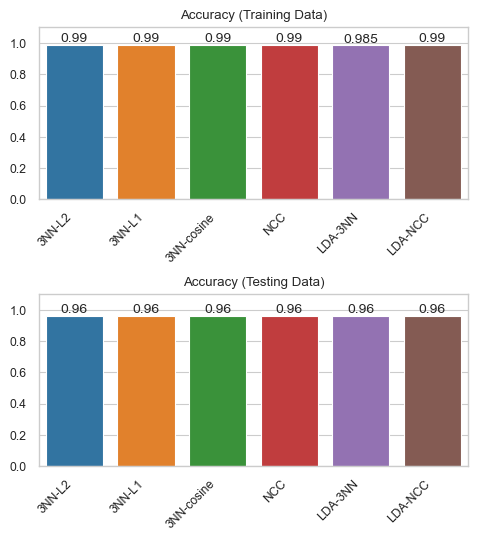

In [ ]:
fig, axs = plt.subplots(2, 1, figsize = (6, 6), sharex=False)
fig.tight_layout(pad = 5)

# Bar chart for training accuracy
plt.subplot(2,1,1)
ax = sns.barplot(
    x = classifier_names,
    y = np.round(train_scores, 3)
)
ax.bar_label(ax.containers[0], fontsize = 10)
plt.ylim((0, 1.1))
plt.xticks(rotation = 45, ha="right")
plt.title("Accuracy (Training Data)")

# Bar chart for testing accuracy
plt.subplot(2,1,2)
ax = sns.barplot(
    x = classifier_names,
    y = np.round(test_scores, 3)
)
ax.bar_label(ax.containers[0], fontsize = 10)
plt.ylim((0, 1.1))
plt.xticks(rotation = 45, ha="right")
plt.title("Accuracy (Testing Data)")
plt.show()

All six classifiers use a (mostly) linear decision boundary; the nearest neighbors methods has slightly nonlinear boundaries since they rely more on local information to label points.

All six methods perform equally well, with only small differences in accuracy of prediction of training data. All seem to be well suited for classifying this data, which contains two well separated classes.

## Part 3b

Repeat the analysis of [Part 3a](#part-3a) using the data contained in ``A3_Prob3b.npz``.

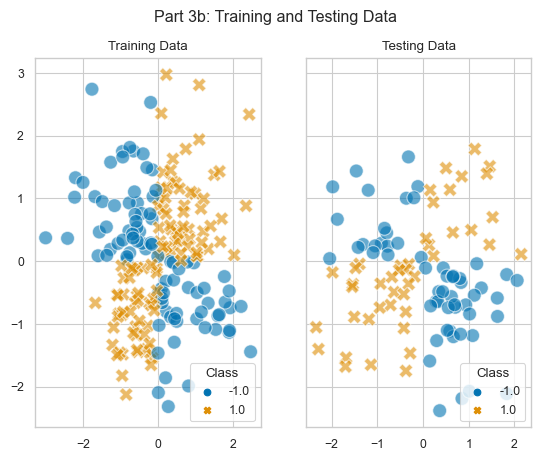

In [ ]:
X_train, y_train, X_test, y_test = Assn3_data_loader("A3_Prob3b.npz")

# Make subplots of training and testing data.
fig, ax = plt.subplots(1,2, sharey = True)

# Plot training data.
plt.subplot(1,2, 1)
class_scatterplots(X_train, y_train, y_train)
plt.legend(title = "Class", loc = "lower right")
plt.title("Training Data")

# Plot testing data.
plt.subplot(1,2, 2)
class_scatterplots(X_test, y_test, y_test)
plt.legend(title = "Class", loc = "lower right")
plt.title("Testing Data")

plt.suptitle("Part 3b: Training and Testing Data")
plt.show()

### Solution

We reuse most of our code from [Part 3a](#part-3a):

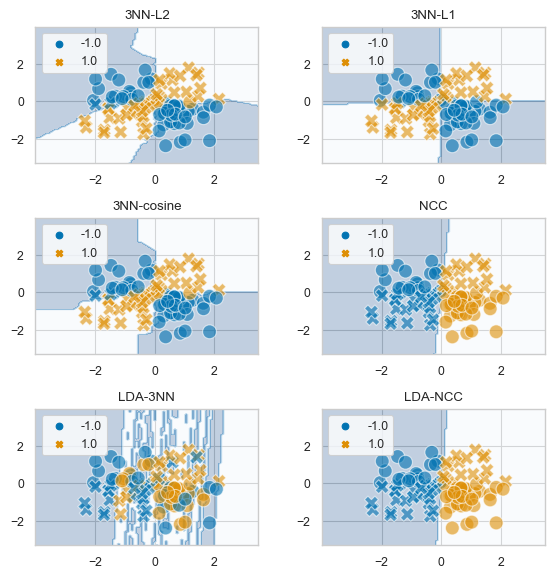

In [ ]:
# Initialize dictionaries for recording prediction accuracy.
train_scores = np.zeros(len(classifier_names))
test_scores = np.zeros(len(classifier_names))

# Initialize figure.
fig, axs = plt.subplots(
    3, 2,
    # sharey = True, sharex = True,
    figsize = (6, 6))
fig.tight_layout(pad = 2)

for i, pipe in enumerate(class_pipelines):
    # Fit i-th classifier.
    pipe.fit(X_train, y_train)

    # Record prediction accuracy.
    train_scores[i] = pipe.score(X_train, y_train)
    test_scores[i] = pipe.score(X_test, y_test)

    # Plot the decision boundaries.
    sp = plt.subplot(3, 2, i + 1)
    DecisionBoundaryDisplay.from_estimator(
        pipe, X_train,
        response_method="predict",
        alpha = 0.25, cmap = plt.cm.Blues_r,
        ax = sp
    )
    # Plot predictions.
    class_scatterplots(
        data = X_test,
        color_labels = pipe.predict(X_test),
        marker_labels = y_test)
    plt.title(classifier_names[i])
    plt.legend(loc = "upper left", title = "")
plt.show()

The decision boundary plots strongly suggest that LDA (as well as nearest centroid classification) is not suited to this data.

Indeed, the given data set is not linearly separable since it consists of one class of points in the positive and negative quadrants and a second in the remaining two quadrants of $\mathbf{R}^2$.
There is no projection onto a line in the plane so that the two classes are separated. The span of the discriminant vector in this case is closely aligned with the $x$-axis and both nearest centroid classifiers essentially label each observation based on the sign of their first component; the nearest neighbor classifier following LDA behaves similarly, but uses labels of nearest neighbors on this line rather than sign to make the prediction.
Since observations from both classes are evenly distributed on the discriminant vector line, none of these methods accurately assign class labels.

On the other hand, the classifiers based entirely on local information via nearest neighbors are mostly able to accurately label both test and training observations.

The following prediction accuracy scores support this claim:

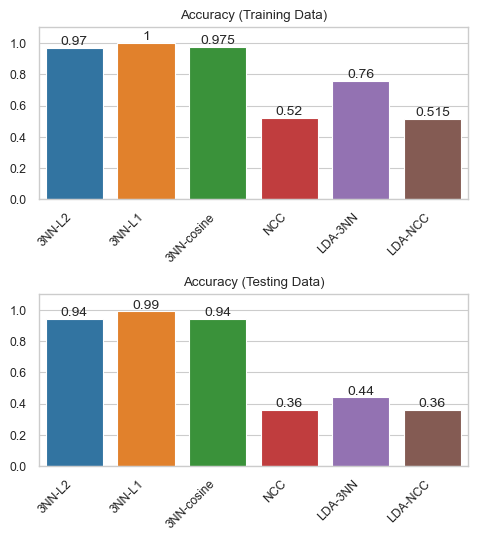

In [ ]:
fig, axs = plt.subplots(2, 1, figsize = (6, 6), sharex=False)
fig.tight_layout(pad = 5)

# Bar chart for training accuracy
plt.subplot(2,1,1)
ax = sns.barplot(
    x = classifier_names,
    y = np.round(train_scores, 3)
)
ax.bar_label(ax.containers[0], fontsize = 10)
plt.ylim((0, 1.1))
plt.xticks(rotation = 45, ha="right")
plt.title("Accuracy (Training Data)")

# Bar chart for testing accuracy
plt.subplot(2,1,2)
ax = sns.barplot(
    x = classifier_names,
    y = np.round(test_scores, 3)
)
ax.bar_label(ax.containers[0], fontsize = 10)
plt.ylim((0, 1.1))
plt.xticks(rotation = 45, ha="right")
plt.title("Accuracy (Testing Data)")
plt.show()

Again, the NCC and LDA classifiers perform extremely poorly relative to the nearest neighbors methods. The LDA-3NN classifier appears to perform reasonably well on the training data, but does not generalize to the testing data.

# Problem 4

The file ``A3_Prob4.npz`` contains data consisting of gray-scale $64\times 64$-pixel images of **cats** and **dogs** stored as $4096$-dimensional vectors. The full data set contains $80$ images of cats and $80$ images of cats, split into $120$ training observations and $40$ testing observations.

We can load the data using the data loader function used in [Problem 3](#data_loader).

In [ ]:
X_train, y_train, X_test, y_test = Assn3_data_loader("A3_Prob4.npz")

We can use the following function to convert these vectors to images.
<a id = "vector_to_image"><a>

In [ ]:
def vector_to_image(x, m, n):
    X_img = np.rot90( # Rotate, after ...
            # np.flipud( # Flipping vertical orientation, after ...
                np.reshape(x, (m, n)), # Reshaping mn-vector as mxn-matrix
                k=3 # rotate 90 deg clockwise = 270 = 3*90ccw
            # )
    )
    return(X_img)

We can use the function ``vector_to_image`` to plot the first four images of cats and the first four of dogs in the training data.

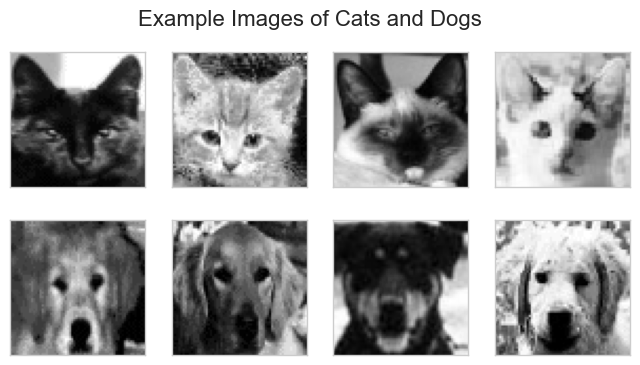

In [ ]:
# Initialize figure.
fig, axs = plt.subplots(2,4, figsize=(8,4))
fig.suptitle("Example Images of Cats and Dogs",
    fontsize = 16)

# Define m and n (dimensions of images).
m = 64; n = m

# Make subplots for cats
# Isolate cat images in training data.
cats_train = X_train[y_train == "cat", :]

# Plot first four cats
for i in range(1,5):
    plt.subplot(2,4, i)
    plt.imshow(vector_to_image(cats_train[i,:], m, n), cmap = "gray")
    plt.xticks([]); plt.yticks([])

# Isolate cat images in training data.
dogs_train = X_train[y_train == "dog", :]

# Plot first four dogs
for i in range(5,9):
    plt.subplot(2,4, i)
    plt.imshow(vector_to_image(dogs_train[i - 4,:], m, n), cmap = "gray")
    plt.xticks([]); plt.yticks([])

plt.show()

## Part a: Principal Component Analysis

Standardize the data set so that each training data predictor variable has sample mean $0$ and standard deviation $1$, and then calculate the **first two principal component directions** for the data matrix stored in ``X_train``.

Convert the loading vectors $\phi_1, \phi_2 \in \mathbf{R}^{4096}$ to $64\times 64$ image vectors and plot these figures using ``plt.imshow``.


### Solution



We first standardize the data ``X_train`` using ``StandardScaler`` and calculate the principal components using ``PCA``:

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize X_train.
Z_train = StandardScaler().fit_transform(X_train)

# Calculate PC vectors.
pcs = PCA(n_components = 2).fit(Z_train).components_

This gives a $p\times 2$ array with the two principal component directions as columns.

We next convert each one of these column vectors to an image and display the principal component vectors as images using ``vector_to_image``.

<!--  -->

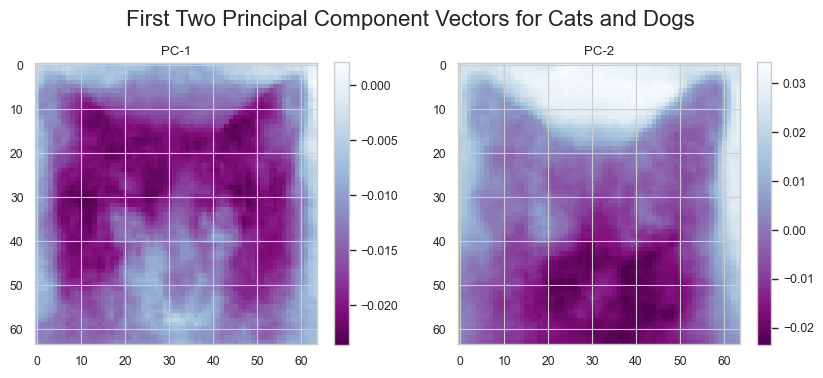

In [ ]:
# Initialize the figure.
fig, axes = plt.subplots(1, 2, figsize=(10,4))
fig.suptitle(
    "First Two Principal Component Vectors for Cats and Dogs",
    fontsize = 16)

# Plot each singular vector as an image.
for i in range(2):
    plt.subplot(1,2, i + 1)
    im = plt.imshow(vector_to_image(pcs[i], m, n), cmap = "BuPu_r")
    plt.title("PC-" + str(i+1))
    plt.colorbar(shrink = 0.92)

# Save and show the figure.
plt.savefig("Cats_Dogs_PCs.png")
plt.show()

These visualizations suggest that the two principal components correspond to physical properties of cats and dogs:

- *PC-1* applies a negative scaling (given by darker pixels) to pixels roughly corresponding to pointy ears (which are typically features of cats, but not dogs).
    
- This implies that the first principal component corresponds to variance in ear shape (and to some extent face width as well, given the position of the other large magnitude pixels).
    

- *PC-2* also applies scaling of pixels corresponding to point ears, but also has a relatively strong scaling factor for pixels that would represent pointy noses (which are features of dogs, but not cats).

## Part 4b: Nearest Centroid Classification after PCA

Apply **nearest centroid classification** using the projected data in the space spanned by the first principal components.

Report the **prediction accuracy** for the training and testing data and plot the decision boundaries of the classifier in the PC space.

### Solution

#### Fitting the Classifier

We start by creating a pipeline called ``pca_ncc`` for performing nearest centroid classification after projection onto the first two principal components; this applies ``StandardScaler`` then ``PCA``, then ``NearestCentroid``.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import NearestCentroid

In [ ]:
# Make pipeline for nearest centroid classification following PCA.
pca_ncc = Pipeline(steps = [
    ("scaler", StandardScaler()),
    ("PCA", PCA(n_components=2)),
    ("NCC", NearestCentroid())
])

# Fit the model using the training data.
pca_ncc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=2)),
                ('NCC', NearestCentroid())])

#### Testing the Classifier

We can check the prediction accuracy using ``pca_ncc.score``:

In [ ]:
# Check training accuracy.
print("Train Accuracy: %1.3f"
  %(pca_ncc.score(X_train, y_train)))

# Check testing accuracy.
print("Test Accuracy: %1.2f"
  %(pca_ncc.score(X_test, y_test)))

Train Accuracy: 0.667
Test Accuracy: 0.70


#### Plotting the Decision Boundaries

We first define the function ``pipeline_boundaries_plot`` for plotting the decision boundaries for a generic classifier, given as pipeline ``pipe``, featuring a mapping of the training data ``X`` to $\mathbf{R}^2$.

In [ ]:
# Function for plotting decision boundaries from class.
def pipeline_boundaries_plot(pipe, X, X_test, y, y_test, color_map):
  from sklearn.inspection import DecisionBoundaryDisplay

  # Transform the data and isolate the classifier.
  Z = pipe[:-1].transform(X)
  Z_test = pipe[:-1].transform(X_test)
  classifier = pipe[-1:]

  # Call the decision boundary function.
  DecisionBoundaryDisplay.from_estimator(
    classifier, np.array(Z_test),
    cmap = color_map)

  # Add scatter plot of test data.
  label_order = np.unique(y_test)
  sns.scatterplot(x = Z_test[:,0], y = Z_test[:,1],
    hue = y_test, hue_order = label_order,
    style = y_test, style_order = label_order,
    alpha = 0.75, s = 175 )

We next use ``pipe_boundaries_plot`` to visualize the decision boundaries of the ``pca_ncc`` classifier.

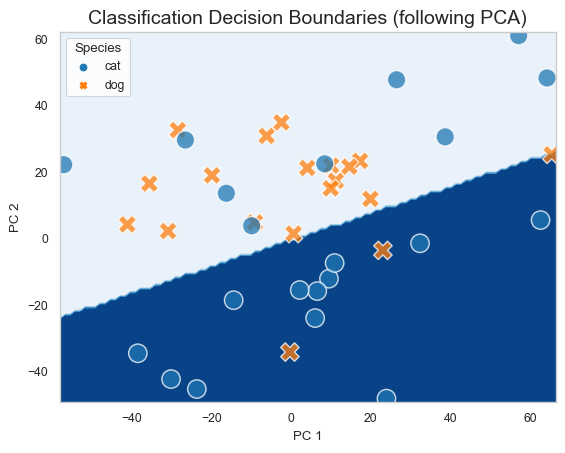

In [ ]:
pipeline_boundaries_plot(
  pipe = pca_ncc,
  X = X_train, X_test = X_test,
  y = y_train, y_test = y_test,
  color_map = "Blues_r")

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(title="Species")
plt.axis("tight")
plt.title("Classification Decision Boundaries (following PCA)",
          fontsize = 14)
plt.show()

## Part 4c: Linear Discriminant Analysis

Since this data set consists of we have two classes (*cats* and *dogs*), linear discriminant analysis will yield one non-trivial discriminant vector.

Calculate this discriminant vector and plot it as an image (as we did with the first few singular vectors in [Part 4a](#part-a-principal-component-analysis)).

**Hints:**

- The ``coef_`` attribute of the ``LinearDiscriminantAnalysis`` class in ``sklearn`` gives the discriminant vector.


### Solution

We can apply LDA to the standardized data ``Z_train`` from our solution for [Part 4a](#part-a-principal-component-analysis):

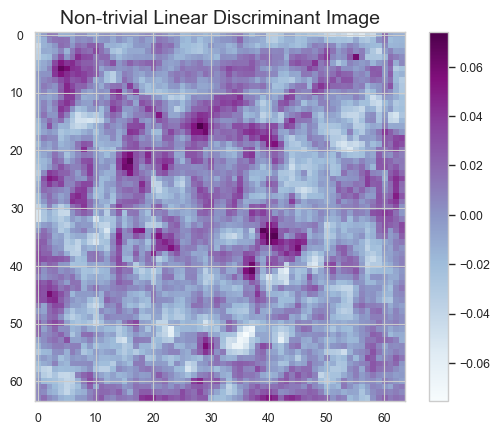

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Calculate the discriminant vector.
LDA = LinearDiscriminantAnalysis() # make LDA class
LDA.fit(Z_train, y_train) # Fit to training data.
dv = LDA.coef_

# Plot the discriminant vector
fig, axes = plt.subplots(1,1)
im = plt.imshow(vector_to_image(dv, m, n), cmap = "BuPu")
plt.colorbar()
plt.title("Non-trivial Linear Discriminant Image",
          fontsize = 14)
plt.show()

It is not as clearly visible as with the plots of the two principal component vectors, but the non-trivial discriminant vector $v$ is also using differences in ear and nose shape to separate dogs and cats on the line $\text{span(v)}$.

## Part 4d: NCC after LDA

Apply **nearest centroid classification** to the data after performing dimension reduction using **LDA**.

As before, report the prediction accuracy for both training and testing data.

Plot the transformed data as points in the plane as follows:

- Associate each projected observation (now a scalar $Px$) with the ordered pair $(Px, c)$, where
$$
    c = \begin{cases} 0, & \text{if $x$ is a cat} \\
        1, & \text{if $x$ is a dog}.
    \end{cases}
$$

- You can then plot the transformed data as a scatter plot. Use color to indicate predicted labels and shape to indicate actual labels (along with vertical position).

This will give an indication of the 1-dimensional class boundaries following LDA.

**Hint:** You will need to convert the class labels to scalars. You can use the [``LabelEncoder`` function](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from ``sklearn`` to do so.

### Solution

#### Calculating the Discriminant Vector

We can transform the data using the following code.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Standardize test data.
sclr = StandardScaler()
Z_train = sclr.fit_transform(X_train)
Z_test = sclr.transform(X_test)

# Data in the 1-D LDA-space
w_train = LDA.transform(Z_train)
w_test = LDA.transform(Z_test)

# Apply LabelEncoder to make transform the labels.
le = LabelEncoder()
b_train = le.fit_transform(y_train)
b_test = le.transform(y_test)

#### Fitting the Classifier on Discriminant Line

We next fit a nearest centroid classifier in the LDA space and predict the class labels of each image.

In [ ]:
ncc = NearestCentroid()
ncc.fit(w_train, y_train)
preds_train = ncc.predict(w_train)
preds_test = ncc.predict(w_test)

#### Validating the Classifier

To visualize the projected data (which belongs to a line), we make a scatter plot with $y$-coordinate indicating species. We start with appending labels to the projected data.

In [ ]:
two_dim_train = np.concatenate([w_train, b_train.reshape(-1,1)], 1)
two_dim_test = np.concatenate([w_test, b_test.reshape(-1,1)], 1)

We're now ready to plot the data and predictions.

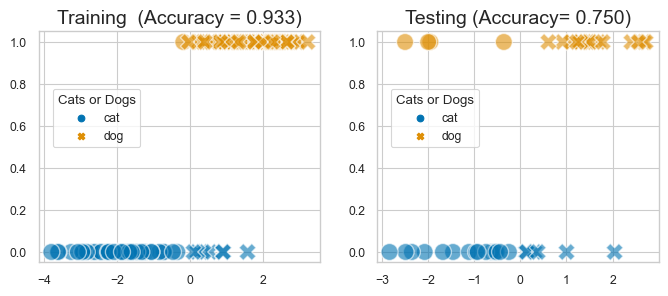

In [ ]:
# Function for scatter plot.
def cat_dog_scatter(data, color_labels, marker_labels):
    sns.scatterplot(
        x = data[:,0], y = data[:,1],
        hue = color_labels, hue_order = ["cat", "dog"],
        style = marker_labels, style_order= ["cat", "dog"],
        s = 150, alpha = 0.6, palette = "colorblind"
    )

fig, axes = plt.subplots(1,2, figsize= (8, 3))
# Training Data
plt.subplot(1,2,1)
cat_dog_scatter(
    data = two_dim_train,
    color_labels = y_train,
    marker_labels = preds_train
)
plt.title("Training  (Accuracy = %1.3f)" %(ncc.score(w_train, y_train)),
          fontsize = 14)
plt.legend(title = "Cats or Dogs", loc = (0.05, 0.5))

# Testing Data
plt.subplot(1,2,2)
cat_dog_scatter(
    data = two_dim_test,
    color_labels = y_test,
    marker_labels = preds_test
)
plt.legend(title = "Cats or Dogs",  loc = (0.05, 0.5))
plt.title("Testing (Accuracy= %1.3f)" %(ncc.score(w_test, y_test)),
          fontsize = 14)
plt.show()


This indicates that LDA is a better dimension reduction than PCA for classification  (even if LDA doesn't generalize extremely well in this case).